Probando construir un dataset de imágenes de diferentes zonas turísticas de Argentina realizando scraping a https://www.shutterstock.com/.
Se creó una archivo 'Turismo Argentina' contenedor de 6 carpetas -'Buenos Aires', 'Patagonia', 'Noroeste', 'Noreste', 'Córdoba', 'Cuyo'- cada una con 20 imágenes etiquetadas con el nombre de la carpeta y un número.
Se incluye al final un script seleccionando dos imágenes de cada carpeta.



In [ ]:
!pip install beautifulsoup4
!pip install requests


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
from google.colab import drive
import shutil

# Montamos Google Drive
drive.mount('/content/drive')

# Función para descargar imágenes y etiquetarlas
def descargar_y_etiquetar_imagenes(url, carpeta_destino):
    # Realizamos la solicitud GET a la página
    response = requests.get(url)

    # Verificamos si la solicitud fue exitosa
    if response.status_code == 200:
        # Parseamos el HTML
        soup = BeautifulSoup(response.text, "html.parser")

        # Buscamos todas las etiquetas 'img' que contienen las imágenes
        image_tags = soup.find_all("img")

        # Agregamos un contador para numerar las imágenes
        image_count = 1

        # Iteramos sobre las etiquetas de las imágenes
        for img_tag in image_tags:
            # Obtenemos la URL de la imagen
            image_url = img_tag.get("src")

            # Descargamos la imagen
            image_data = requests.get(image_url).content

            # Guardamos la imagen en Google Drive
            image_file_path = os.path.join(carpeta_destino, f"imagen_{image_count}.jpg")
            with open(image_file_path, "wb") as f:
                f.write(image_data)

            # Incrementamos el contador de imágenes
            image_count += 1

        print(f"Imágenes de {carpeta_destino} descargadas y etiquetadas correctamente.")
    else:
        print(f"Error al obtener la página web de {carpeta_destino}.")

# Creamos el dataset "Turismo Argentina" si no existe
dataset_path = "/content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina"
if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)
else:
    # Si el dataset ya existe, lo vaciamos para evitar la acumulación de carpetas e imágenes anteriores
    shutil.rmtree(dataset_path)
    os.makedirs(dataset_path)

# URLs de las páginas para scrapear
urls = {
    "Patagonia":"https://www.shutterstock.com/es/search/turismo-argentina-patagonia?image_type=photo",
    "Noroeste": "https://www.shutterstock.com/es/search/turismo-argentina-noroeste?image_type=photo",
    "Noreste":"https://www.shutterstock.com/es/search/turismo-argentina-noreste?image_type=photo",
    "Cuyo": "https://www.shutterstock.com/es/search/turismo-argentina-cuyo?image_type=photo",
    "Buenos Aires": "https://www.shutterstock.com/es/search/turismo-argentina-buenos-aires?image_type=photo",
    "Córdoba": "https://www.shutterstock.com/es/search/turismo-argentina-cordoba?image_type=photo"
}

# Iteramos sobre las regiones y descargamos las imágenes
for region, url in urls.items():
    # Creamos la carpeta de la región dentro del dataset "Turismo Argentina"
    carpeta_region = os.path.join(dataset_path, region)
    os.makedirs(carpeta_region)

    # Descargamos las imágenes y las etiquetamos
    descargar_y_etiquetar_imagenes(url, carpeta_region)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Imágenes de /content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina/Patagonia descargadas y etiquetadas correctamente.
Imágenes de /content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina/Noroeste descargadas y etiquetadas correctamente.
Imágenes de /content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina/Noreste descargadas y etiquetadas correctamente.
Imágenes de /content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina/Cuyo descargadas y etiquetadas correctamente.
Imágenes de /content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina/Buenos Aires descargadas y etiquetadas correctamente.
Imágenes de /content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina/Córdoba descargadas y etiquetadas correctamente.


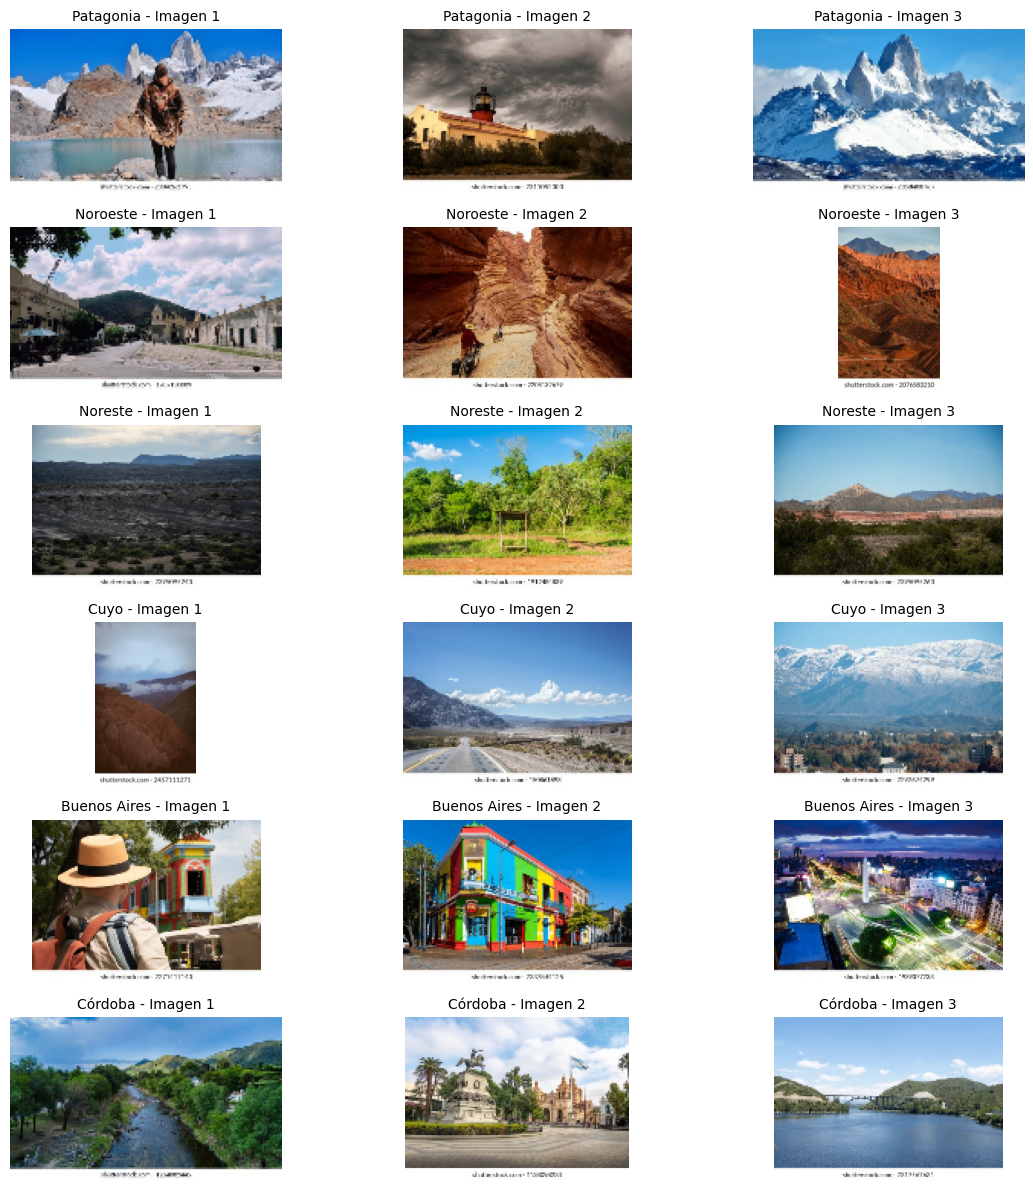

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Directorio raíz del dataset "Turismo Argentina"
dataset_path = "/content/drive/MyDrive/ISPC_TPF_Turismo/Turismo_Argentina"

# Lista de carpetas de regiones
regiones = ["Patagonia", "Noroeste", "Noreste","Cuyo", "Buenos Aires","Córdoba"]

# Configuramoa la visualización en un formato de 150x150 píxeles
plt.figure(figsize=(12, 12))

# Iteramos sobre cada carpeta de región
for i, region in enumerate(regiones):
    # Obtener la ruta completa de la carpeta de la región
    region_folder = os.path.join(dataset_path, region)

    # Obtenemos la lista de nombres de archivos de imágenes en la carpeta de la región
    image_files = os.listdir(region_folder)

    # Seleccionamos al azar 3 imágenes de la carpeta
    selected_images = random.sample(image_files, 3)

    # Iteramos sobre las imágenes seleccionadas
    for j, image_file in enumerate(selected_images):
        # Obtenemos la ruta completa de la imagen
        image_path = os.path.join(region_folder, image_file)

        # Cargamos la imagen con OpenCV
        img = cv2.imread(image_path)

        # Obtenemos la relación de aspecto original de la imagen
        aspect_ratio = img.shape[1] / img.shape[0]  # Ancho / Alto

        # Redimensionamos la imagen a un tamaño de 150 píxeles de ancho, manteniendo la relación de aspecto original
        img_resized = cv2.resize(img, (150, int(150 / aspect_ratio)))

        # Mostramos la imagen
        plt.subplot(len(regiones), 3, i*3 + j + 1)
        plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))  # Convertimos BGR a RGB para mostrar en Matplotlib
        plt.title(f"{region} - Imagen {j+1}", fontsize=10)  # Añadimos etiqueta de región y número de imagen
        plt.axis('off')

plt.tight_layout()
plt.show()
